In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import sklearn

In [4]:
# Read CSV 
data = pd.read_csv('../../Resources/bio_vars_frame.csv')
data.drop(['Unnamed: 0', 
           'Max Temperature of Warmest Month', 
           'Min Temperature of Coldest Month', 
           'Precipitation of Wettest Month', 
           'Precipitation of Driest Month', 
           'Precipitation Seasonality (Coefficient of Variation)', 
           'Mean Diurnal Range (Mean of monthly (max temp - min temp))', 
           'Temperature Annual Range', 
           'Annual Mean Temperature', 
           'Isothermality', 
           'Temperature Seasonality', 
           'raster_frame'], axis=1, inplace=True)
data.tail(10)

,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Annual Precipitation,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter
1684846,184.0,121.0,191.0,-14.0,338.0,126.0,41.0,102.0,79.0
1684847,184.0,121.0,191.0,-14.0,340.0,126.0,41.0,102.0,80.0
1684848,185.0,121.0,191.0,-14.0,338.0,126.0,41.0,102.0,79.0
1684849,185.0,121.0,191.0,-14.0,337.0,125.0,41.0,101.0,79.0
1684850,185.0,122.0,192.0,-14.0,336.0,125.0,41.0,101.0,78.0
1684851,184.0,121.0,190.0,-14.0,340.0,126.0,41.0,102.0,80.0
1684852,189.0,126.0,196.0,-11.0,322.0,120.0,40.0,97.0,75.0
1684853,198.0,134.0,205.0,-7.0,293.0,110.0,37.0,89.0,67.0
1684854,201.0,137.0,208.0,-5.0,280.0,105.0,35.0,85.0,63.0
1684855,202.0,138.0,209.0,-4.0,276.0,105.0,34.0,84.0,62.0


# Data Pre-Processing

In [5]:
X = data.drop('Annual Precipitation', axis=1)
y = data['Annual Precipitation']
print(X.shape, y.shape)

(1684856, 8) (1684856,)


# Model

In [6]:
# import train_test_split and split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate model
model = LinearRegression() 

In [8]:
# fit model to the training data
model.fit(X_train, y_train)
# calculate scores of training and testing data
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
# print scores 
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')


Training Score: 0.9955291275812698
Testing Score: 0.9955008783193351


In [10]:
coef = model.coef_
print(coef)

[-0.01199511  0.04436215  0.07333604 -0.07863754  1.12978573  1.45373465
  0.70103801  0.72964446]


In [25]:
training_prediction = model.predict(X_train)
testing_prediction = model.predict(X_test)


print(f'Training Probability: {training_prob}')
print(f'Testing Probability: {testing_prediction}')

Training Probability: [194.04873447 250.98543268 276.53797817 ... 729.97249424 410.57899687
 287.73964593]
Testing Probability: [190.58606587 283.90356959 190.28550252 ... 371.90492888 146.32456566
 328.82592527]


Text(0.5, 1.0, 'Residual Plot')

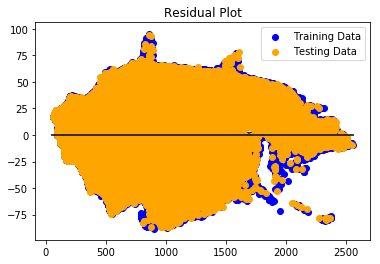

In [13]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color='blue', label='Training Data')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, color='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title('Residual Plot')

In [15]:
pd.DataFrame({"Prediction": testing_prediction, "Actual": y_test})

,Prediction,Actual
764786,190.586066,192.0
351495,283.903570,259.0
1210042,190.285503,197.0
1074720,1714.387732,1741.0
1587825,234.094629,235.0
1439783,301.164707,290.0
257830,474.992389,475.0
530628,312.112671,313.0
1557436,303.559707,295.0
1288260,334.791774,339.0
